In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/Farhan/Documents/python jupyter/Datasets/diabetes2.csv")

In [3]:
df.head()

,Glucose,BloodPressure,Insulin,Age,Outcome
0,148,72,0,50,1
1,85,66,0,31,0
2,183,64,0,32,1
3,89,66,94,21,0
4,137,40,168,33,1


In [4]:
df.describe()

,Glucose,BloodPressure,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,33.240885,0.348958
std,31.972618,19.355807,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,24.000000,0.000000
50%,117.000000,72.000000,30.500000,29.000000,0.000000
75%,140.250000,80.000000,127.250000,41.000000,1.000000
max,199.000000,122.000000,846.000000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Glucose        768 non-null    int64
 1   BloodPressure  768 non-null    int64
 2   Insulin        768 non-null    int64
 3   Age            768 non-null    int64
 4   Outcome        768 non-null    int64
dtypes: int64(5)
memory usage: 30.1 KB


<Axes: xlabel='Outcome', ylabel='count'>

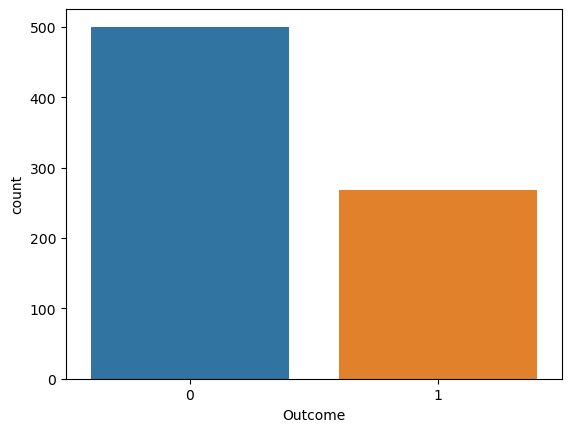

In [6]:
sns.countplot(x='Outcome',data=df)

<Axes: >

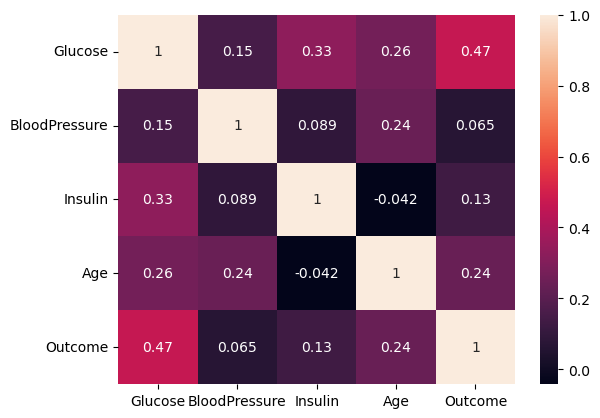

In [7]:
 sns.heatmap(df.corr(), annot=True)

In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

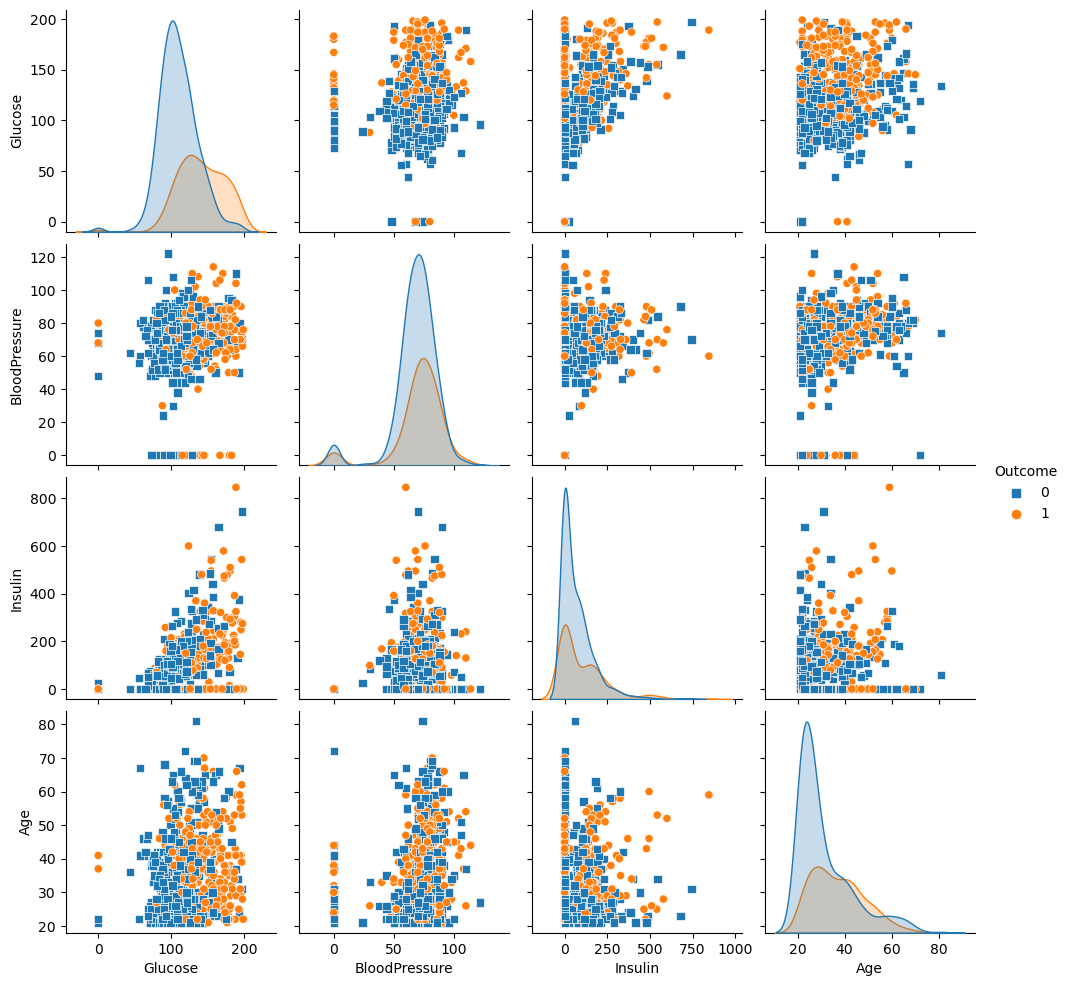

In [13]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", markers=["s", "o"])

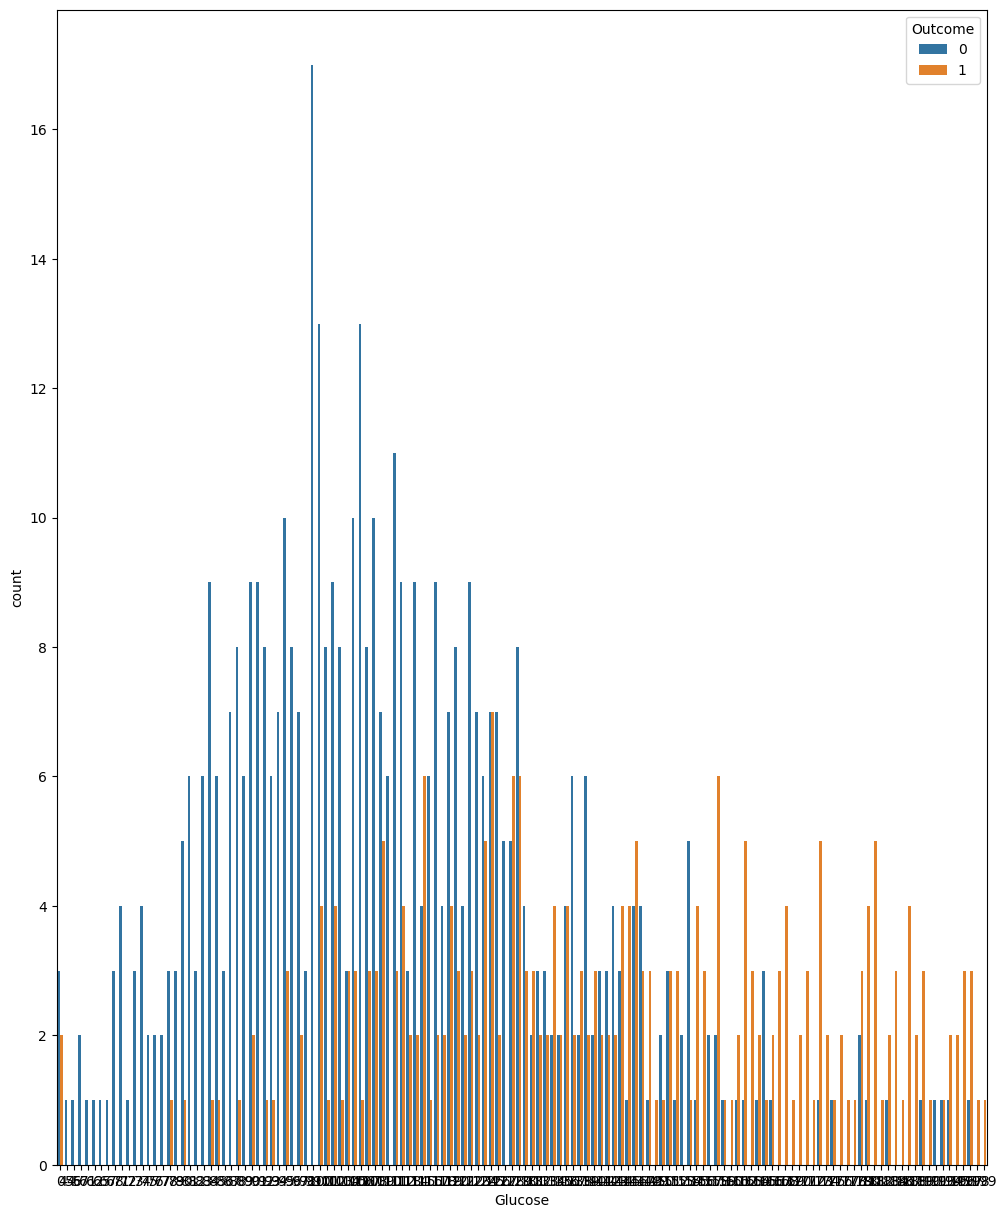

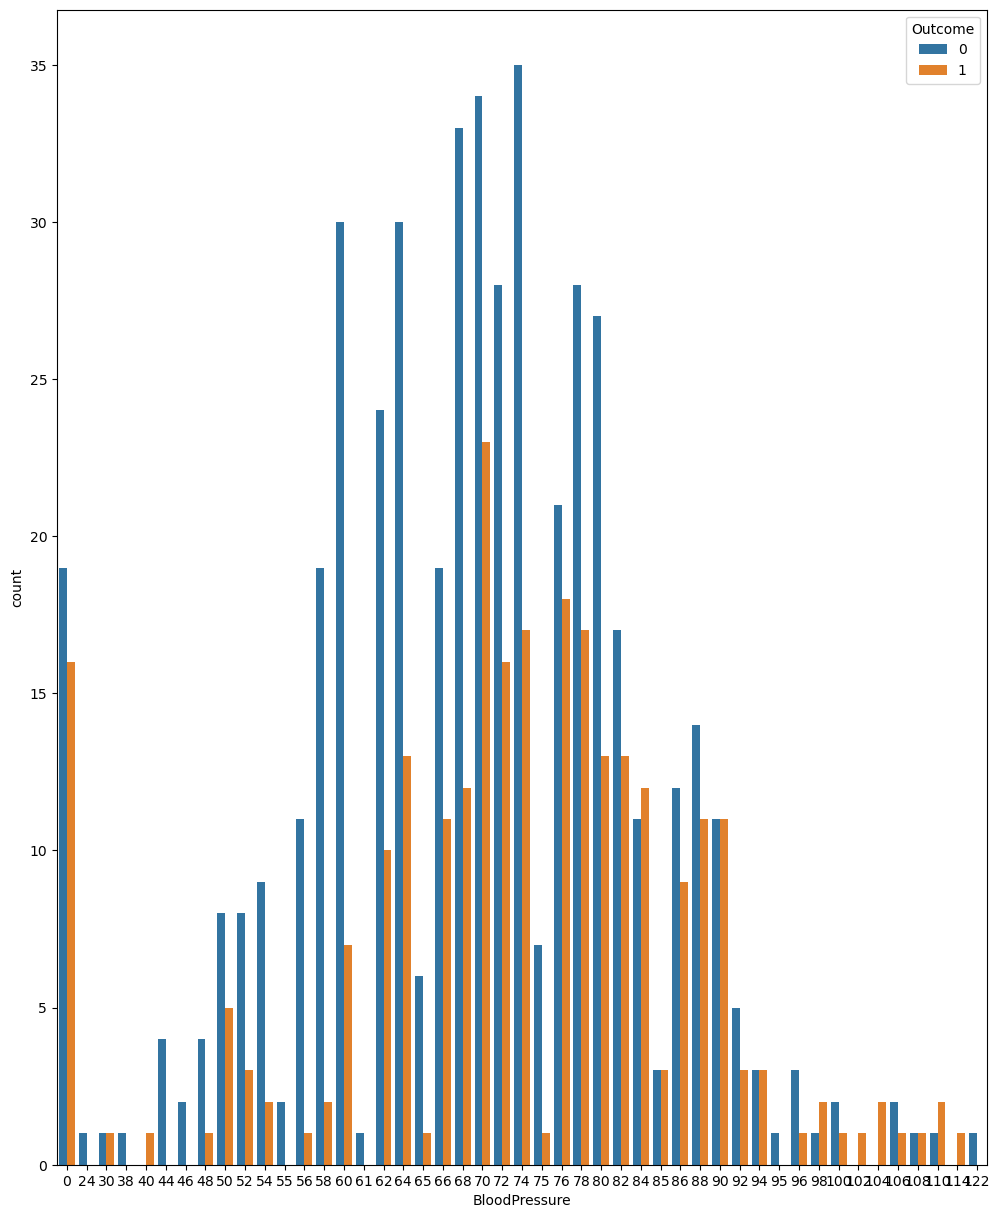

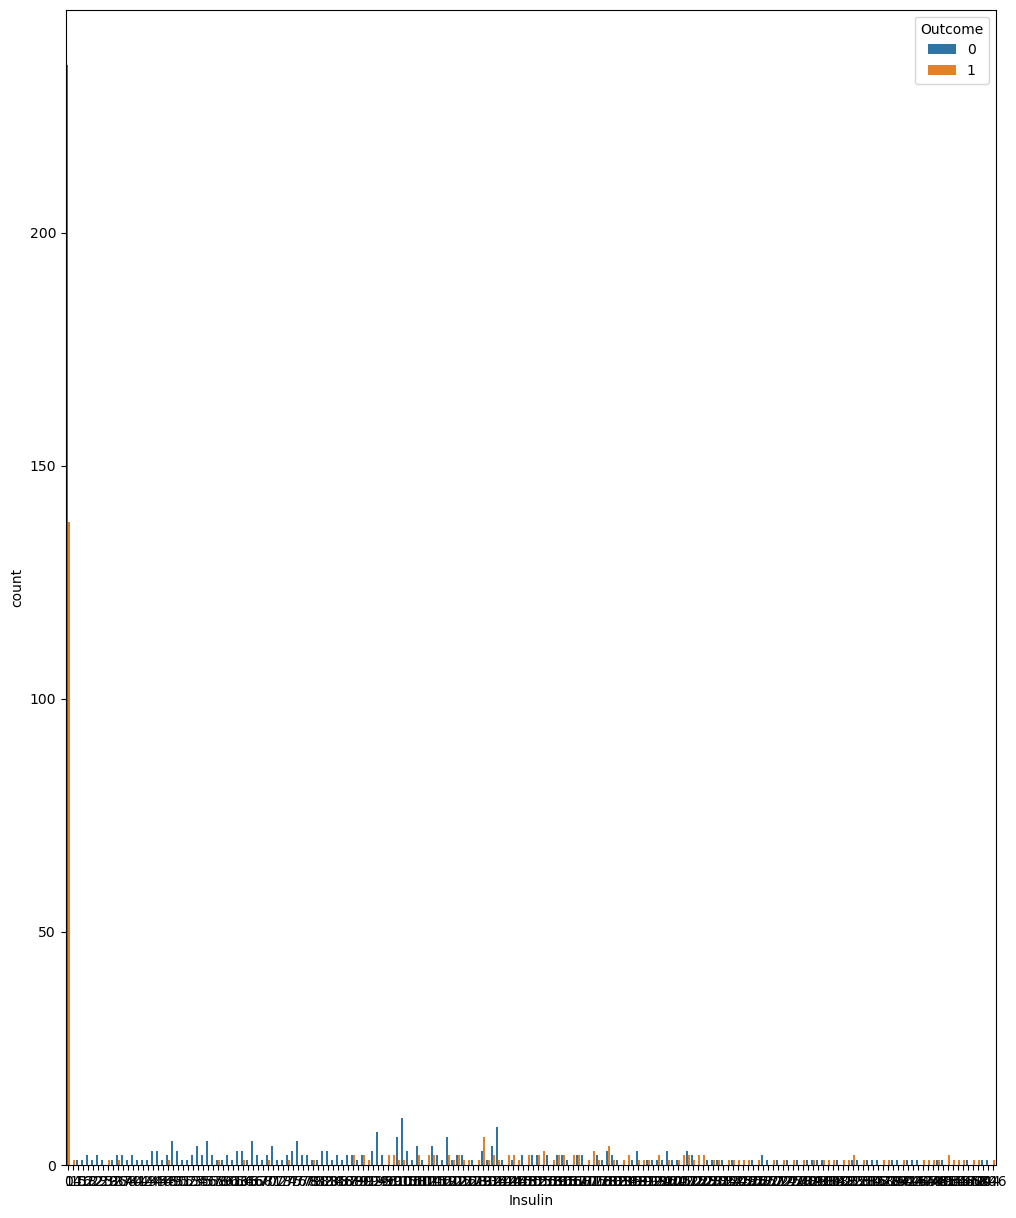

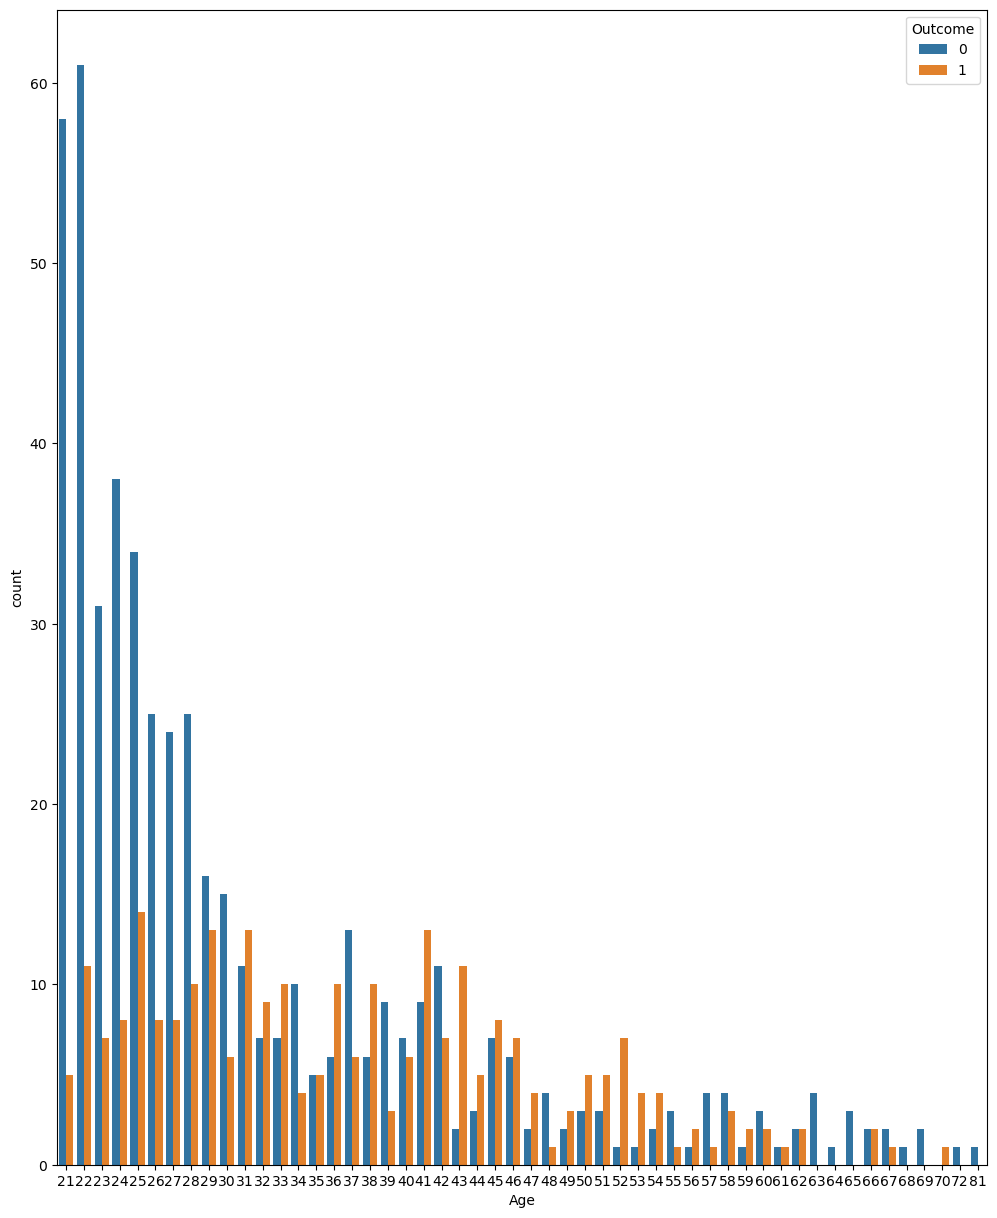

In [16]:
for cat_col in x:
    plt.figure(figsize=(12, 15))
    sns.countplot(x=cat_col, data=df, hue='Outcome')

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier

model_1 = LogisticRegression()
model_2 = RandomForestClassifier()
model_3 = DecisionTreeClassifier()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac  

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

model_1.fit(x_train,y_train)
model_2.fit(x_train,y_train)
model_3.fit(x_train,y_train)

print("Training data accuracy")
print("Logistic Regression:",ac(y_train,model_1.predict(x_train))*100)
print("RandomForestClassifier:",ac(y_train,model_2.predict(x_train))*100)
print("DecisionTreeClassifier:",ac(y_train,model_3.predict(x_train))*100)



print("Test data accuracy")
print("Logistic Regression:",ac(y_test,model_1.predict(x_test))*100)
print("RandomForestClassifier:",ac(y_test,model_2.predict(x_test))*100)
print("DecisionTreeClassifier:",ac(y_test,model_3.predict(x_test))*100)

Training data accuracy
Logistic Regression: 73.55679702048417
RandomForestClassifier: 100.0
DecisionTreeClassifier: 100.0
Test data accuracy
Logistic Regression: 77.05627705627705
RandomForestClassifier: 74.89177489177489
DecisionTreeClassifier: 70.56277056277057


In [68]:
import numpy as np
outcome = {0: 'yes', 1: 'no'}

def logistic(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model_1.predict(new)[0]]


def random_forest(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model_2.predict(new)[0]]

def decision_tree(Glucose,BloodPressure,Insulin,Age):
    new = np.array([[Glucose,BloodPressure,Insulin,Age]])
    return outcome[model_3.predict(new)[0]]
Glucose = int(input("Enter the Glucose level :"))
BloodPressure= int(input("Enter the BloodPressure level :"))
Insulin= int(input("Enter the Insulin level :"))
Age = int(input("Enter the Age :"))

outcome1 = logistic(Glucose,BloodPressure,Insulin,Age)
outcome2 = decision_tree(Glucose,BloodPressure,Insulin,Age)
outcome3 = random_forest(Glucose,BloodPressure,Insulin,Age)

print('The patient is diabetic (Logistic Regression) :', outcome1)
print('The patient is diabetic (DecisionTreeClassifier) :', outcome2)
print('The patient is diabetic (RandomForestClassifier) :', outcome3)

Enter the Glucose level :45
Enter the BloodPressure level :57
Enter the Insulin level :75
Enter the Age :75
The patient is diabetic (Logistic Regression) : yes
The patient is diabetic (DecisionTreeClassifier) : yes
The patient is diabetic (RandomForestClassifier) : yes


C:\Users\Farhan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Farhan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Farhan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.metrics import confusion_matrix

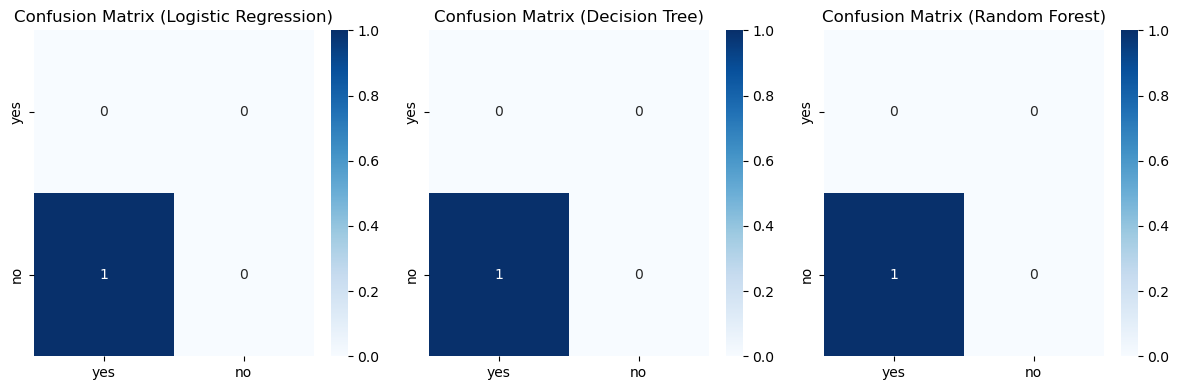

In [70]:
true_outcome = outcome[1]  

conf_matrix1 = confusion_matrix([true_outcome], [outcome1], labels=list(outcome.values()))
conf_matrix2 = confusion_matrix([true_outcome], [outcome2], labels=list(outcome.values()))
conf_matrix3 = confusion_matrix([true_outcome], [outcome3], labels=list(outcome.values()))

plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(conf_matrix1, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Logistic Regression)")

plt.subplot(133)
sns.heatmap(conf_matrix3, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Random Forest)")

plt.subplot(132)
sns.heatmap(conf_matrix2, annot=True, cmap="Blues", fmt="d", xticklabels=list(outcome.values()), yticklabels=list(outcome.values()))
plt.title("Confusion Matrix (Decision Tree)")



plt.tight_layout()
plt.show()